## Import Data and dependencies
---

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV path and read in
datapath = 'Data_set/clean_spotify_youtube.csv'
cat_data = pd.read_csv(datapath)

# display sample of data
cat_data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


## Write a function to use for .groupby
---

In [11]:
# Define function and set variables within 
def sum_data(group=['Artist','Album_type','Licensed','official_video'],column=['Views','Stream'],num_spots=2,color=str,y_change = float,by_amount=['Billions','Trillions']):

    #set up groupby for datasets and aggregation for analysis along with sorting the columns
    group_df = cat_data.groupby(group).agg({column:'sum'}).sort_values(column,ascending=False).reset_index()
    group_df_1 = cat_data.groupby(group).agg({column:'mean'}).sort_values(column,ascending=False).reset_index()
    plot_df = group_df.head(num_spots).sort_values(by=column,ascending=False)

    # this code is for formating dataset print outs into normal numbers with punctuations
    group_df.loc[:,str(column)] = group_df[str(column)].map('{:,.0f}'.format)
    group_df_1.loc[:,str(column)] = group_df_1[str(column)].map('{:,.0f}'.format)
    
    # the line below turns the scientific notation into regular numbers
    plt.ticklabel_format(axis = 'y', style='plain')

    # plot the data and set plot fonts and labels
    plt.bar(plot_df[group].astype('str'),(plot_df[column])/y_change,color=color)
    plt.xlabel(group,fontdict={'fontsize':15})
    plt.ylabel(f"{column} in {by_amount}",fontdict={'fontsize':15})
    plt.xticks(ticks=np.arange(num_spots) ,labels= plot_df[group].astype('str'),  rotation=45,ha='right')
    plt.title(f"{column} by {group}",fontdict={'fontsize':18})
    plt.tight_layout()

    # save the plots to a png file 
    plt.savefig(f"./Data_set/{group}_by_{column}.png")

    # Show the plot and data after calculations 
    plt.show()
    print(f"Showing Top {num_spots} Spots by {column}")
    return group_df.head(num_spots) , group_df_1.head(num_spots)
    

## Group by artist 
---

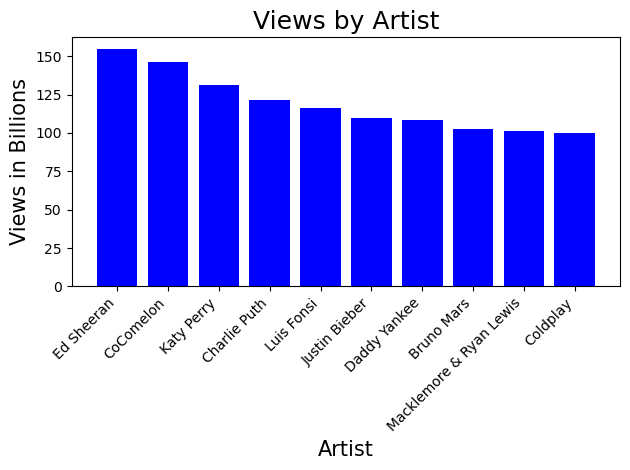

Showing Top 10 Spots by Views


(                    Artist           Views
 0               Ed Sheeran  15,460,207,769
 1                CoComelon  14,601,671,211
 2               Katy Perry  13,120,632,075
 3             Charlie Puth  12,167,594,191
 4               Luis Fonsi  11,628,113,031
 5            Justin Bieber  10,991,060,236
 6             Daddy Yankee  10,871,926,842
 7               Bruno Mars  10,240,919,227
 8  Macklemore & Ryan Lewis  10,122,055,560
 9                 Coldplay   9,997,277,884,
                     Artist          Views
 0               Ed Sheeran  1,546,020,777
 1                CoComelon  1,460,167,121
 2               Katy Perry  1,312,063,208
 3             Charlie Puth  1,216,759,419
 4               Luis Fonsi  1,162,811,303
 5            Justin Bieber  1,099,106,024
 6             Daddy Yankee  1,087,192,684
 7               Bruno Mars  1,024,091,923
 8  Macklemore & Ryan Lewis  1,012,205,556
 9                 Coldplay    999,727,788)

In [13]:
# plot views by artist using the function
sum_data('Artist','Views',10,'blue',100000000,'Billions')

Analysis: 
* The plot is showing the top ten artists by youtube views summing all songs they have within the data set. 
* The first set of 10 print outs is showing the numerical value of the sum of all the songs the artist has within the data set.
* The second set of 10 print outs is showing the average number of views by artist. The data set carries 10 songs per artist so there really isnt much change in the numebrs.

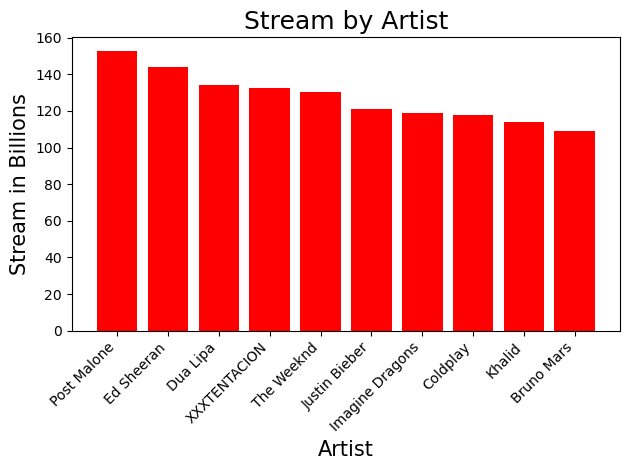

Showing Top 10 Spots by Stream


(            Artist          Stream
 0      Post Malone  15,251,263,853
 1       Ed Sheeran  14,394,881,557
 2         Dua Lipa  13,408,076,274
 3     XXXTENTACION  13,224,351,699
 4       The Weeknd  13,031,973,376
 5    Justin Bieber  12,097,767,422
 6  Imagine Dragons  11,858,310,928
 7         Coldplay  11,778,478,236
 8           Khalid  11,386,839,915
 9       Bruno Mars  10,897,862,950,
             Artist         Stream
 0      Post Malone  1,525,126,385
 1       Ed Sheeran  1,439,488,156
 2         Dua Lipa  1,340,807,627
 3     XXXTENTACION  1,322,435,170
 4       The Weeknd  1,303,197,338
 5    Justin Bieber  1,209,776,742
 6  Imagine Dragons  1,185,831,093
 7         Coldplay  1,177,847,824
 8           Khalid  1,138,683,992
 9       Bruno Mars  1,089,786,295)

In [14]:
# plot streams by artist using the function
sum_data('Artist','Stream',10,'red',100000000,'Billions')

Analysis: 
* The plot is showing the top ten artists by Spotify streams summing all songs they have within the data set. 
* The first set of 10 print outs is showing the numerical value of the sum of all the songs the artist has within the data set.
* The second set of 10 print outs is showing the average number of streams by artist. The data set carries 10 songs per artist so there really isnt much change in the numebrs.

## Group by Album Type
---

better off looking at average 

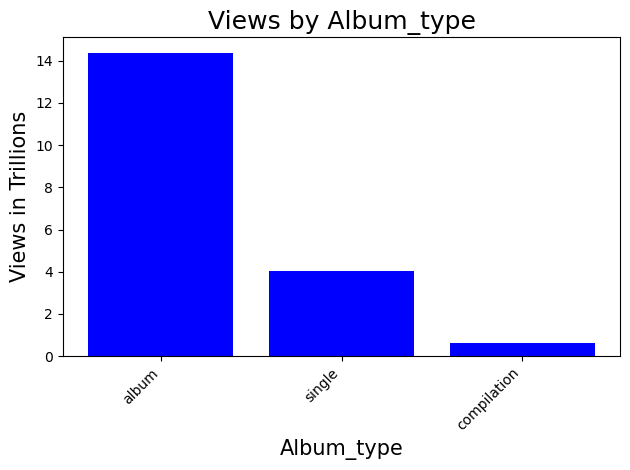

Showing Top 3 Spots by Views


(    Album_type              Views
 0        album  1,438,910,059,139
 1       single    401,916,456,409
 2  compilation     61,226,486,759,
     Album_type       Views
 0        album  98,427,393
 1       single  82,698,859
 2  compilation  79,618,318)

In [15]:
# plot views by album type using the function
sum_data('Album_type','Views',3,'blue',100000000000,'Trillions')

Analysis: 
* The plot is showing the number of views within this categorical breakdown. The popularity of a video seems to be more popular when its within an album according to the data.
* The first set of print outs is showing the sum of these categories and leaves a large gap between them.
* The second set of print outs is showing the average of the album type and we can see that the gap quickly closes. Its possible this data set would benifit from further rewiew using the average instead of the sum total.

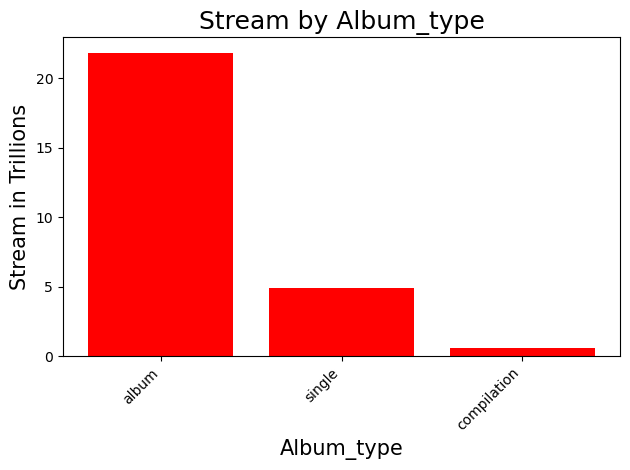

Showing Top 3 Spots by Stream


(    Album_type             Stream
 0        album  2,183,382,627,508
 1       single    493,103,212,262
 2  compilation     61,661,758,924,
     Album_type       Stream
 0        album  149,978,199
 1       single  101,670,765
 2  compilation   84,007,846)

In [16]:
# plot stream by album type using the function
sum_data('Album_type','Stream',3,'red',100000000000,'Trillions')

Analysis: 
* The plot is showing the number of streams according to album type. We can see the gap is rather large when looking at the sum total of this variable.
* The first set of print outs displays the numerical sum of each album type with its total streams.
* The second set of print outs displays a different picture due to using the average streams by album type. It is possible this graph may benifit from using average over sum for plotting.

## Group by Licensed
---

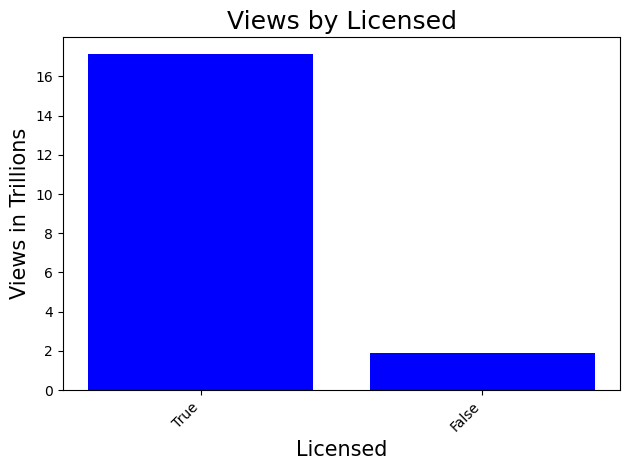

Showing Top 2 Spots by Views


(   Licensed              Views
 0      True  1,713,218,436,430
 1     False    188,834,565,877,
    Licensed        Views
 0      True  121,161,134
 1     False   30,915,941)

In [17]:
# plot views by licensed using the function
sum_data('Licensed','Views',2,'blue',100000000000,'Trillions')

Analysis: 
* The plot is showing the sum total of views by wether a song was licensed or not. We can see pretty clearly according to the chart the licensed songs are more popular according to the data.
* The first set of print outs is just showing the numerical totals for the chart above.
* The second set of print outs is showing the average views by licensed column which still shows a difference but lowers the gap and may need further review. 

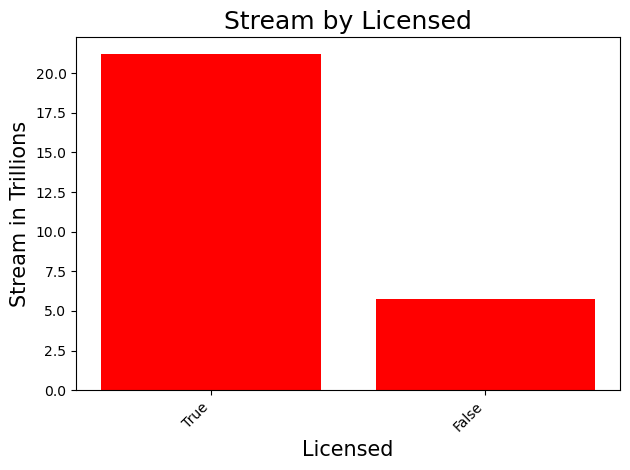

Showing Top 2 Spots by Stream


(   Licensed             Stream
 0      True  2,120,642,657,923
 1     False    575,760,230,600,
    Licensed       Stream
 0      True  153,848,132
 1     False   97,454,338)

In [18]:
# plot stream by licensed using the function
sum_data('Licensed','Stream',2,'red',100000000000,'Trillions')

Analysis: 
* The plot is showing the total number of streams based off if a song is licensed or not. This graph shows similar read outs as the above graph.
* The first set of print outs is the numbers of the plot above it. 
* The second set of print outs is the average stream by licensed and lowers the gap but its still there.

## Grouped by Official Video 
---

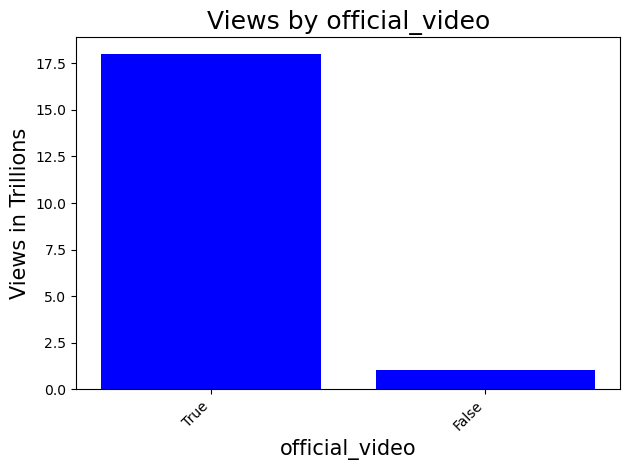

Showing Top 2 Spots by Views


(   official_video              Views
 0            True  1,800,201,071,589
 1           False    101,851,930,718,
    official_video        Views
 0            True  114,494,757
 1           False   22,508,714)

In [19]:
# plot views by official video using the function
sum_data('official_video','Views',2,'blue',100000000000,'Trillions')

Analysis: 
* The plot is showing the total number of views by if a song is an offical video or not. The data set shows that official songs do better than unofficial songs.
* The first set of print outs is just the numbers of the plot above it.
* The second set of print outs is the average views by official video and this like several of the other graphs lowers this gap but doesnt get rid of it.

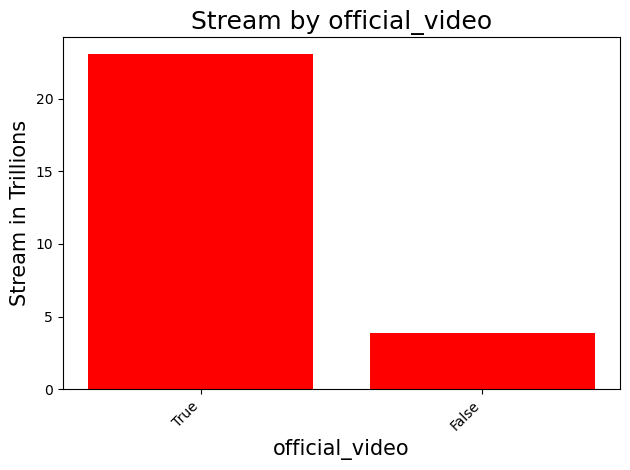

Showing Top 2 Spots by Stream


(   official_video             Stream
 0            True  2,308,140,276,225
 1           False    388,262,612,298,
    official_video       Stream
 0            True  150,583,264
 1           False   88,969,435)

In [20]:
# plot stream by official video using the function
sum_data('official_video','Stream',2,'red',100000000000,'Trillions')

Analysis: 
* The plot is showing the total number of streams by wether a song is the official video or not.
* The first set of print outs is just the numbers the above plot uses.
* The second set of is the average and again lowers the gap but we still see a gap exists according to the data.